# Question

Draw lines for the coins that fall under the same straight line (vertical). You have to use the OpenCV algorithm to detect the coins and draw straight lines not only for this image but for any image.

# Coin Detection using OpenCV
This is a program to detect coins in an image using Hough Circle Transform and note that the parameters like minDist, minRadius, maxRadius can vary from image to image.



### Algorithm for finding the coins that fall under the same st.line (Vertical)
1. I have devised my own algorithm for finding the coins that fall under the same st.line (Vertical).
2. We find all the circles(coins) whose x-coordinates of the centres have difference less than 40(say).
3. If the difference in x-coordinates of the centres of the circles are more than 40, we say that circles are not aligned i.e, they are not along same st.line. Note that the number '40' may change from image to image.

In [1]:
import os
print(os.environ['PATH'])
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/naveen/anaconda3/bin:/home/naveen/anaconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin


In [2]:
#Read the Image
image = 'coin.jpg'
img = cv2.imread(image, 1)

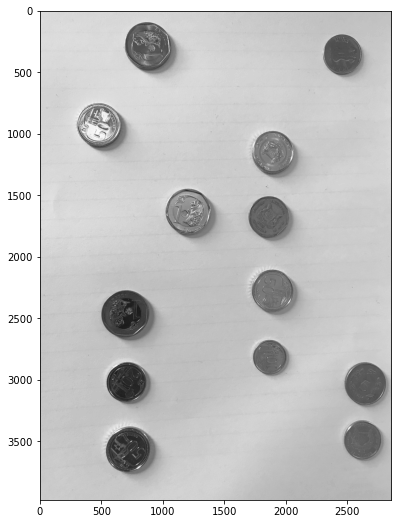

In [3]:
#Original_Copy
img_org = img.copy()
#Convert to GrayScale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

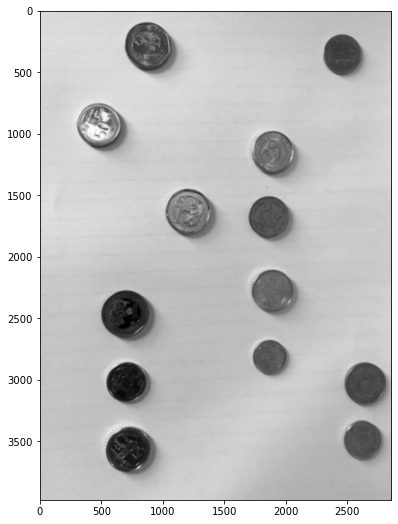

In [4]:
#Blur the imgae(Parameters can vary from image to image)
img = cv2.GaussianBlur(img, (31,31), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img, cmap='gray')

In [5]:
#Detecting the coins using HOUGH CIRCLE TRANSFORM
#Parameters like minDist, minRadius, maxRadius can vary from image to image
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=50, param2=30, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
print(circles)
print(circles.shape)

[[[ 466  926  154]
  [ 694 3026  155]
  [1888 1146  164]
  [ 682 2470  184]
  [ 868  282  184]
  [2644 3030  174]
  [1202 1632  183]
  [2452  352  155]
  [1860 1678  168]
  [ 710 3578  176]
  [1886 2276  170]
  [2622 3484  159]
  [1870 2818  142]]]
(1, 13, 3)


In [6]:
#Reduce the dimension and sort along 0th index(x-coordinate of the centres of the circles)
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]
print(circles)
print(circles.shape)

[[ 466  926  154]
 [ 682 2470  184]
 [ 694 3026  155]
 [ 710 3578  176]
 [ 868  282  184]
 [1202 1632  183]
 [1860 1678  168]
 [1870 2818  142]
 [1886 2276  170]
 [1888 1146  164]
 [2452  352  155]
 [2622 3484  159]
 [2644 3030  174]]
(13, 3)


In [7]:
#----------------------------Algorithm for finding the coins that fall under the same st.line (Vertical)--------------------------------------

#We find all the circles whose x-coordinates of the centres have difference less than 40(say)
#If the diff. in x-coordinates of the centre are more than 40, we say that circles are not aligned i.e, not along same st.line
lines = np.empty([0,3] ,dtype=int)

i=0
while(i < circles.shape[0] - 1):
    j=i+1
    b=False
    nxt=1
    min_y = circles[i][1]
    max_y = circles[i][1]
    while(j < circles.shape[0]):
        if(circles[j][0] - circles[i][0] <= 40): #Here the number '40' might vary from image to image
            x1 = circles[i][0]
            if circles[j][1] < min_y:
                min_y = circles[j][1]
            
            x2 = circles[j][0]
            if circles[j][1] > max_y:
                max_y = circles[j][1]
                
            b=True
            nxt+=1
            
        j=j+1
    if b:
        x=int(np.mean([x1,x2]))
        lines = np.append(lines, [[x, min_y, max_y]], axis=0)
    i+=nxt

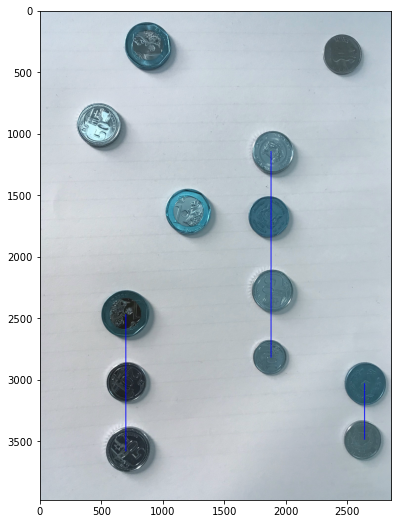

In [8]:
#Drawing lines for coins that fall under the same straight line.(Vertical)
output = img_org.copy()
for i in range(lines.shape[0]):
    output = cv2.line(output, (lines[i][0],lines[i][1]), (lines[i][0],lines[i][2]), (0,0,255), 6)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(output)